<a href="https://colab.research.google.com/github/AbeerProg/RRDS/blob/main/AllModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install openpyxl --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Embedding, Conv1D, MaxPooling1D, LSTM,
                                     Dense, Dropout, Flatten, Concatenate)
from tensorflow.keras.optimizers import Adam



In [8]:
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

file_path = '/content/ Revdataset.xlsx'
df = pd.read_excel(file_path)

# Preprocessing
df = df.dropna(subset=[df.columns[0], df.columns[-1]])
df = df.dropna()

df[df.columns[-1]] = df[df.columns[-1]].astype(int)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df[df.columns[0]] = df[df.columns[0]].astype(str).apply(clean_text)

texts = df.iloc[:, 0].tolist()
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X_text = pad_sequences(sequences, maxlen=max_len)

X_features_raw = df.iloc[:, 1:-1].values
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features_raw)

y = df.iloc[:, -1].values

X_train_text, X_test_text, X_train_features, X_test_features, y_train, y_test = train_test_split(
    X_text, X_features, y, test_size=0.2, random_state=42
)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# Model Definitions

def build_cnn():
    text_input = Input(shape=(max_len,))
    x = Embedding(max_words, 128)(text_input)
    x = Conv1D(128, 5, activation='relu')(x)
    x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    feat_input = Input(shape=(X_features.shape[1],))
    f = Dense(64, activation='relu')(feat_input)

    merged = Concatenate()([x, f])
    merged = Dropout(0.5)(merged)
    output = Dense(1, activation='sigmoid')(merged)

    model = Model(inputs=[text_input, feat_input], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer=Adam(1e-4), metrics=['accuracy'])
    return model

def build_lstm():
    text_input = Input(shape=(max_len,))
    x = Embedding(max_words, 128)(text_input)
    x = LSTM(128)(x)

    feat_input = Input(shape=(X_features.shape[1],))
    f = Dense(64, activation='relu')(feat_input)

    merged = Concatenate()([x, f])
    merged = Dropout(0.5)(merged)
    output = Dense(1, activation='sigmoid')(merged)

    model = Model(inputs=[text_input, feat_input], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer=Adam(1e-4), metrics=['accuracy'])
    return model

def build_cnn_lstm():
    text_input = Input(shape=(max_len,))
    x = Embedding(max_words, 128)(text_input)
    x = Conv1D(64, 5, activation='relu')(x)
    x = MaxPooling1D(2)(x)
    x = LSTM(64)(x)

    feat_input = Input(shape=(X_features.shape[1],))
    f = Dense(64, activation='relu')(feat_input)

    merged = Concatenate()([x, f])
    merged = Dropout(0.5)(merged)
    output = Dense(1, activation='sigmoid')(merged)

    model = Model(inputs=[text_input, feat_input], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer=Adam(1e-4), metrics=['accuracy'])
    return model


 Training CNN...
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6042 - loss: 0.6770 - val_accuracy: 0.6842 - val_loss: 0.6265
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7067 - loss: 0.6073 - val_accuracy: 0.7473 - val_loss: 0.5561
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7645 - loss: 0.5367 - val_accuracy: 0.8133 - val_loss: 0.4761
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8209 - loss: 0.4589 - val_accuracy: 0.8456 - val_loss: 0.4099
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.8524 - loss: 0.3931 - val_accuracy: 0.8635 - val_loss: 0.3666
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8629 - loss: 0.3522 - val_accuracy: 0.8640 - val_loss: 0.3400
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8775 - loss: 0.3191 - val_accuracy: 0.8654 - val_loss: 0.3215
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.8916 - loss: 

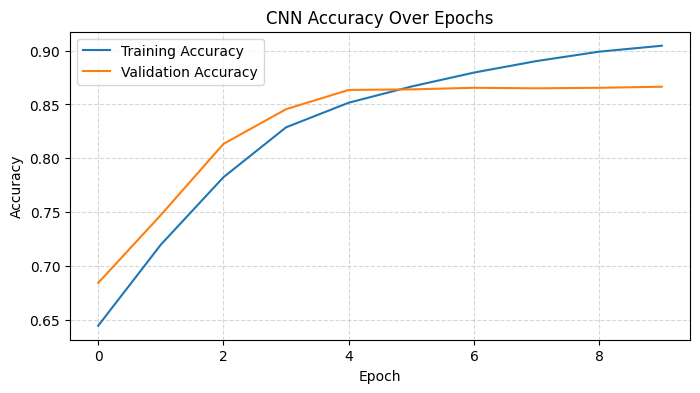

 Training LSTM...
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 38s 122ms/step - accuracy: 0.5496 - loss: 0.6904 - val_accuracy: 0.7085 - val_loss: 0.5997
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 35s 124ms/step - accuracy: 0.7073 - loss: 0.5848 - val_accuracy: 0.7632 - val_loss: 0.5136
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 33s 116ms/step - accuracy: 0.7692 - loss: 0.5083 - val_accuracy: 0.7944 - val_loss: 0.4601
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 31s 111ms/step - accuracy: 0.8066 - loss: 0.4474 - val_accuracy: 0.8307 - val_loss: 0.4133
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 32s 114ms/step - accuracy: 0.8428 - loss: 0.3909 - val_accuracy: 0.8366 - val_loss: 0.3853
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 34s 119ms/step - accuracy: 0.8585 - loss: 0.3546 - val_accuracy: 0.8357 - val_loss: 0.3656
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 35s 122ms/step - accuracy: 0.8745 - loss: 0.3150 - val_accuracy: 0.8396 - val_loss: 0.3509
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 34s 119ms/step - accuracy

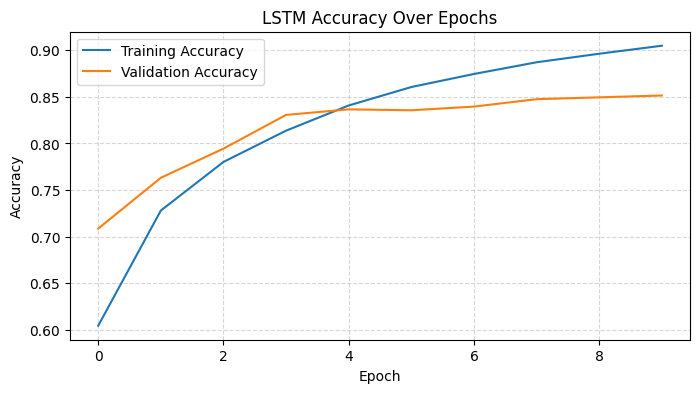

 Training CNN+LSTM...
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.5141 - loss: 0.7166 - val_accuracy: 0.6912 - val_loss: 0.6169
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.6838 - loss: 0.6085 - val_accuracy: 0.7761 - val_loss: 0.5305
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.7694 - loss: 0.5169 - val_accuracy: 0.7964 - val_loss: 0.4650
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8190 - loss: 0.4404 - val_accuracy: 0.8252 - val_loss: 0.4233
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.8504 - loss: 0.3798 - val_accuracy: 0.8466 - val_loss: 0.3861
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.8673 - loss: 0.3418 - val_accuracy: 0.8466 - val_loss: 0.3671
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.8833 - loss: 0.2989 - val_accuracy: 0.8481 - val_loss: 0.3551
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.

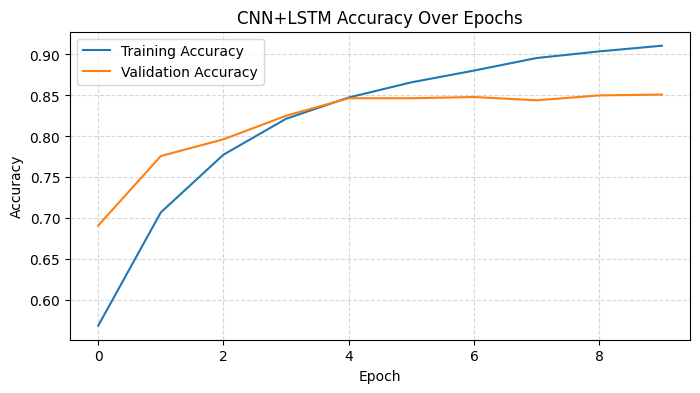

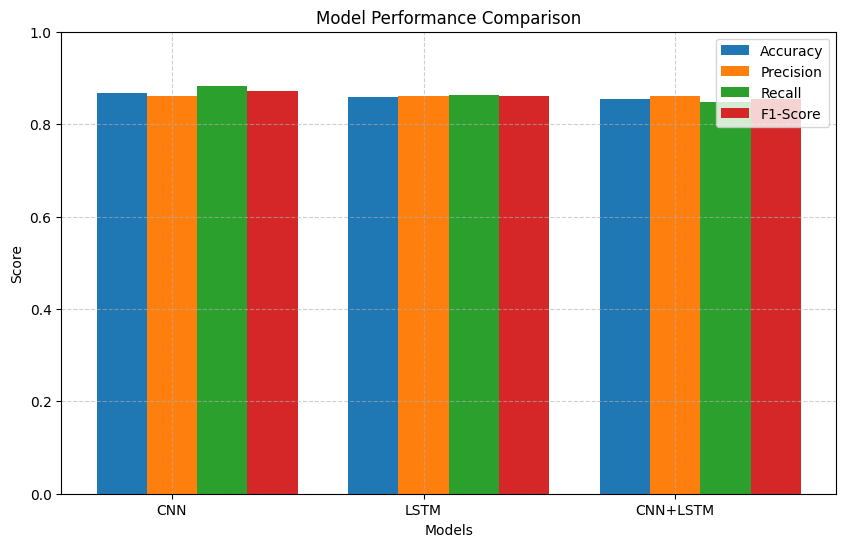

In [13]:

# Train and Evaluate

def train_and_evaluate(model_fn, name):
    print(f" Training {name}...")
    model = model_fn()
    history = model.fit([X_train_text, X_train_features], y_train,
                        epochs=10, batch_size=64, validation_split=0.1, verbose=1)

    y_pred = (model.predict([X_test_text, X_test_features]) > 0.5).astype("int32")

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f" {name} Classification Report:")
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).T
    print(report_df)

    # Plot accuracy
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    return acc, prec, rec, f1

# Run All Models
results = {}
results["CNN"] = train_and_evaluate(build_cnn, "CNN")
results["LSTM"] = train_and_evaluate(build_lstm, "LSTM")
results["CNN+LSTM"] = train_and_evaluate(build_cnn_lstm, "CNN+LSTM")

#Visualize Results
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
labels = list(results.keys())
values = np.array(list(results.values())).T

x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(10, 6))
for i in range(len(metrics)):
    plt.bar(x + i * width, values[i], width, label=metrics[i])

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width, labels)
plt.ylim(0, 1.0)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [12]:
comparison_df = pd.DataFrame(results, index=metrics).T
print("Model Comparison Table:")
print(comparison_df.round(4))


Model Comparison Table:
          Accuracy  Precision  Recall  F1-Score
CNN         0.8679     0.8701  0.8704    0.8702
LSTM        0.8564     0.8469  0.8763    0.8613
CNN+LSTM    0.8480     0.8412  0.8646    0.8527


158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


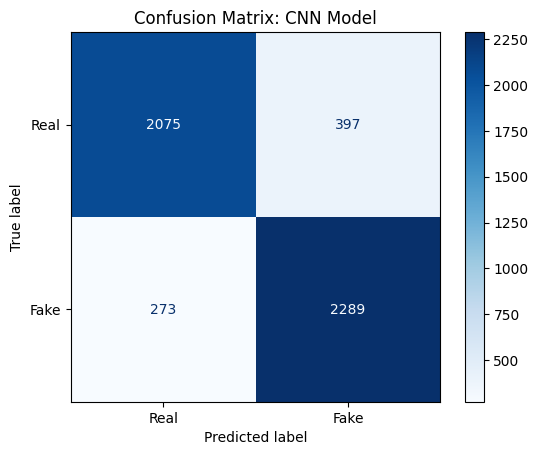

 Examples of Misclassified Reviews:

Review: thing greasy fryer oil need changing...
True Label: 0 | Predicted: 1

 Model saved as cnn_fake_review_model.h5
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step


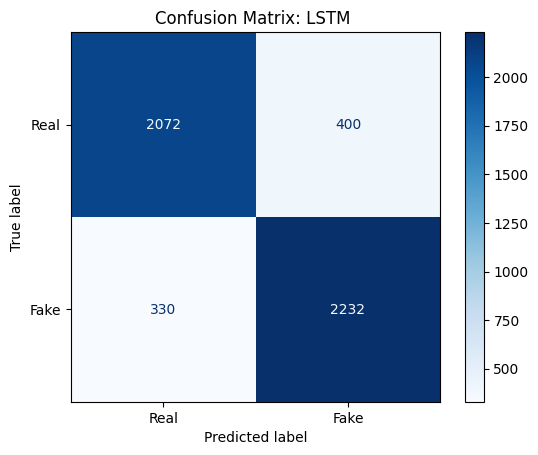


 Examples of Misclassified Reviews:

Review: today placed online order lg hot chocolate coffee cake muffin website advertised coffee cake muffin ordered cost surprise received delivery muffin non ordered paid went location order placed gave unwanted item back demanded refund everytime visit particular dunkin donut store never coffee cake muffi...
True Label: 0 | Predicted: 1



 Model saved as cnn_lstm_fake_review_model.h5
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


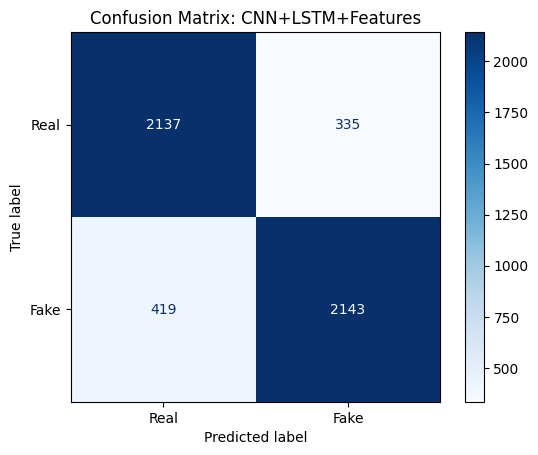


 Examples of Misclassified Reviews:

Review: thing greasy fryer oil need changing...
True Label: 0 | Predicted: 1

 Model saved as cnn_lstm_fake_review_model.h5


In [14]:
# ✅ Post-training Analysis for CNN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

final_model = build_cnn()
final_model.fit([X_train_text, X_train_features], y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=0)
final_preds = (final_model.predict([X_test_text, X_test_features]) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, final_preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"]).plot(cmap="Blues")
plt.title("Confusion Matrix: CNN Model")
plt.grid(False)
plt.show()

print(" Examples of Misclassified Reviews:")
review_texts = df.iloc[:, 0].tolist()
_, X_test_raw = train_test_split(review_texts, test_size=0.2, random_state=42)

for i in range(len(y_test)):
    if y_test[i] != final_preds[i]:
        print(f"\nReview: {X_test_raw[i][:300]}...")
        print(f"True Label: {y_test[i]} | Predicted: {final_preds[i][0]}")
        if i > 5:
            break


# Save the final model
final_model.save("cnn_fake_review_model.h5")
print("\n Model saved as cnn_fake_review_model.h5")


# Post-training Analysis for LSTM
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
final_model = build_lstm()
final_model.fit([X_train_text, X_train_features], y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=0)

final_preds = (final_model.predict([X_test_text, X_test_features]) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, final_preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"]).plot(cmap="Blues")
plt.title("Confusion Matrix: LSTM ")
plt.grid(False)
plt.show()
print("\n Examples of Misclassified Reviews:")
review_texts = df.iloc[:, 0].tolist()
_, X_test_raw = train_test_split(review_texts, test_size=0.2, random_state=42)

for i in range(len(y_test)):
    if y_test[i] != final_preds[i]:
        print(f"\nReview: {X_test_raw[i][:300]}...")
        print(f"True Label: {y_test[i]} | Predicted: {final_preds[i][0]}")
        if i > 5:
            break


# Save the final model
final_model.save("lstm_fake_review_model.h5")
print("\n Model saved as cnn_lstm_fake_review_model.h5")


# Post-training Analysis for Model CNN+LSTM
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

final_model = build_cnn_lstm()
final_model.fit([X_train_text, X_train_features], y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=0)

# Predict again
final_preds = (final_model.predict([X_test_text, X_test_features]) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, final_preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"]).plot(cmap="Blues")
plt.title("Confusion Matrix: CNN+LSTM+Features")
plt.grid(False)
plt.show()

# Misclassified Review Inspection (Fixed)
print("\n Examples of Misclassified Reviews:")
review_texts = df.iloc[:, 0].tolist()
_, X_test_raw = train_test_split(review_texts, test_size=0.2, random_state=42)

for i in range(len(y_test)):
    if y_test[i] != final_preds[i]:
        print(f"\nReview: {X_test_raw[i][:300]}...")
        print(f"True Label: {y_test[i]} | Predicted: {final_preds[i][0]}")
        if i > 5:
            break


# Save the final model
final_model.save("cnn_lstm_fake_review_model.h5")
print("\n Model saved as cnn_lstm_fake_review_model.h5")